# Homework 4
任课老师：胡俊峰

负责助教：苏亚鲁、李浩然

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止日期：3月9日24点

## 第零部分 代码理解
### 0.1 阅读代码预测结果，分析结果是否如预期

In [3]:
testList = ['a', 0, 2]

for entry in testList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        print("The reciprocal of",entry,"is",r)
        break
    except ValueError:
        print("Value Error")
    except (ZeroDivisionError):
        print("ZeroDivision Error")# value error, ZeroDivision error, 0.5

The entry is a
Value Error
The entry is 0
ZeroDivision Error
The entry is 2
The reciprocal of 2 is 0.5


In [6]:
class Dog(object):

    def __init__(self,name):
        self.name = name

    @property
    def eat(self):
        print(" %s is eating" %self.name)
        return 

d = Dog("Wangchai")

d.eat
d.eat()

 Wangchai is eating
 Wangchai is eating


TypeError: 'NoneType' object is not callable

In [7]:
import re   

p = re.compile(r'\d+')             # 匹配1-n个数字
print (p.split('one1two22three3four4'))
print (p.findall('one1two22three3four4'))

['one', 'two', 'three', 'four', '']
['1', '22', '3', '4']


In [8]:
m = re.finditer(r'([a-z]+)','one1;two32 three3,four4') 
print(next(m))
print(next(m))
print(next(m))
print(next(m))

<re.Match object; span=(0, 3), match='one'>
<re.Match object; span=(5, 8), match='two'>
<re.Match object; span=(11, 16), match='three'>
<re.Match object; span=(18, 22), match='four'>


In [9]:
m = re.finditer(r'([a-z]+)([0-9]+)','one1;two32 three3,four4') 
print(next(m))
print(next(m).group())  # 整个模式
print(next(m).group(1)) # 子模式1
print(next(m).group(2)) # 子模式2

<re.Match object; span=(0, 4), match='one1'>
two32
three
4


### 0.2 Python的私有属性和“受保护的”属性
Python 不能像 Java 那样使用 private 修饰符创建私有属性，但是Python 有个简单的机制，能避免子类意外覆盖“私有”属性。\
举个例子。有人编写了一个名为 Dog 的类，这个类的内部用到了 mood实例属性，但是没有将其开放。现在，你创建了 Dog 类的子类：Beagle。\
如果你在毫不知情的情况下又创建了名为 mood 的实例属性，那么在继承的方法中就会把 Dog 类的 mood 属性覆盖掉。这是个难以调试的问题。\
为了避免这种情况，如果以 __mood 的形式（两个前导下划线，尾部没有或最多有一个下划线）命名实例属性，Python 会把属性名存入实例的__dict__ 属性中，而且会在前面加上一个下划线和类名。因此，对Dog 类来说，__mood 会变成 _Dog__mood；对 Beagle 类来说，会变成_Beagle__mood。这个语言特性叫名称改写（name mangling）。

In [10]:
class Vector2d:
    typecode = 'd'
    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)
    @property
    def x(self): 
        return self.__x
    @property
    def y(self):
        return self.__y
    def __iter__(self):
        return (i for i in (self.x, self.y))

if __name__=='__main__':
    v1 = Vector2d(3, 4)
    print(v1.__dict__)
    print(v1._Vector2d__x)

{'_Vector2d__x': 3.0, '_Vector2d__y': 4.0}
3.0


不是所有 Python 程序员都喜欢名称改写功能，也不是所有人都喜欢self.__x 这种不对称的名称。有些人不喜欢这种句法，他们约定使用一个下划线前缀编写“受保护”的属性（如 self._x）。批评使用两个下划线这种改写机制的人认为，应该使用命名约定来避免意外覆盖属性。
> "绝对不要使用两个前导下划线，这是很烦人的自私行为。如果担心名称冲突，应该明确使用一种名称改写方式（如_MyThing_blahblah）。这其实与使用双下划线一样，不过自己定的规则比双下划线易于理解。" —— Ian Bicking

Python 解释器不会对使用单个下划线的属性名做特殊处理，不过这是很多 Python 程序员严格遵守的约定，他们不会在类外部访问这种属性。
遵守使用一个下划线标记对象的私有属性很容易，就像遵守使用全大写字母编写常量那样容易。
> 不过在**模块**中，顶层名称使用一个前导下划线的话，的确会有影响：对 from mymod import * 来说，mymod 中前缀为下划线的名称不会被导入。然而，依旧可以使用 from mymod import _privatefunc 将其导入。

In [ ]:

#单个下划线修饰的“_”的变量、函数、类在使用from xxx import *时都不会被导入
class _Bug(object):  #单个下划线修饰的私有类。
    @staticmethod
    def showbug():
        print("showbug")

Python 文档的某些角落把使用一个下划线前缀标记的属性称为“受保护的”属性。 使用 self._x 这种形式保护属性的做法很常见，但是很少有人把这种属性叫作“受保护的”属性。有些人甚至将其称为“私有”属性。\
总之，python并**不能真正实现**私有和不可变，只有通过**双下滑线内在机制**规避子类对父类属性的覆盖，或者通过遵守**单下划线的人为规定**来实现类的分量的“私有”和类的示例的“不可变”。

## 第一部分 正则表达式(3分)
### 1.1 用正则表达式进行账号、密码、电话、生日判断(2分)
具体格式要求如下：
<br>账号：由英文字母组成，不限大小写。
<br>密码：由英文字母与数字组成且以英文字母开头，最少八位。
<br>电话：11位数字，且以1开头。
<br>生日：年-月-日(YYYY-MM-DD)。

In [121]:
import re
account=r"[a-z,A-Z]+$"
password=r"[a-z,A-Z][a-zA-Z0-9]{7,}$"
telephone=r"1\d{10}$"
birthday=r"((([0-9]{3}[1-9]|[0-9]{2}[1-9][0-9]{1}|[0-9]{1}[1-9][0-9]{2}|[1-9][0-9]{3})-(((0[13578]|1[02])-(0[1-9]|[12][0-9]|3[01]))|((0[469]|11)-(0[1-9]|[12][0-9]|30))|(02-(0[1-9]|[1][0-9]|2[0-8]))))|((([0-9]{2})(0[48]|[2468][048]|[13579][26])|((0[48]|[2468][048]|[3579][26])00))-02-29))" # YYYY-MM-DD
# YYYY 保证不出现0000年
# MM-DD共同判定，分类讨论，可以判断闰年

#TODO

assert re.match(account,"PyThoN")
assert re.match(password,"Python2022")
assert re.match(telephone,"12345678910")
assert re.match(birthday,"2022-03-14")

### 1.2 邮箱的正则表达式匹配(1分)
要求：邮箱中间须有@，@之前由英文字母、数字、下划线(_)、短横(-)组成，之后由英文字母、数字、下划线(_)、短横(-)、英文句号(.)组成，且必须有至少一个英文句号(.)。

In [3]:
import re

email="[a-zA-Z0-9_,-]+@[a-zA-Z0-9_,-]*[.][a-zA-Z0-9_,-.]*$"

assert re.match(email,"2-102@pku.edu.cn")

## 第二部分：发布-订阅模式实现（5分）

### 2.1 读取并解析tang300.xml文件，打印前2首诗的内容（即前12行）。编写函数各保存20首李白、杜甫、白居易、王維（維是繁体）的诗，要求为每首诗歌生成独立的数据对象，包括标题、作者、诗内容（按行）的元组（tuple）。(1.5分)
关于xml解析的相关代码，可以参看https://www.runoob.com/python/python-xml.html

In [ ]:
'''
可使用xml.dom.minidom来解析xml文件
'''
import xml.dom.minidom
domTree = xml.dom.minidom.parse("tang300.xml")

# 打印前12行内容

print("前两首诗内容：")
root_node = domTree.documentElement
zuoye = root_node.getElementsByTagName("作业用唐诗")[0:12]
for poem in zuoye:
    line = poem.getElementsByTagName("contance")[0].firstChild.data
    if line[0] in ['#', '$']:
        print(line[2:])
    else:
        print(line)

# get_poems()函数保存20首李白、杜甫、白居易、王維（維是繁体）的诗
def get_poems():
    #TODO
    allZuoYe = root_node.getElementsByTagName("作业用唐诗")
    poemId = {}
    poemCounts = {"李白":0, "杜甫":0, "白居易":0, "王維":0}
    names = ["李白", "杜甫", "白居易", "王維"]
    answer = []
    for i in allZuoYe: # find target id
        if (name:=i.getElementsByTagName("contance")[0].firstChild.data[2:]) in names:
            if poemCounts[name] < 20:
                poemCounts[name] += 1
                poemId[i.getElementsByTagName("Poem_id")[0].firstChild.data] = []
    for i in allZuoYe: # add poem into value of each id
        if (id:=i.getElementsByTagName("Poem_id")[0].firstChild.data) in poemId:
            line = i.getElementsByTagName("contance")[0].firstChild.data
            poemId[id].append(line[2:] if line[0] in ['#', '$'] else line)
    for i in poemId: # transfer into tuple
        answer.append(tuple(poemId[i]))
    return answer
result = get_poems()
#print(result)


### 2.2 实现设计模式中的观察者模式，本部分将以2.1中提取的诗歌信息作为主题。(3.5分)

观察者模式也被称为发布-订阅（Publish/Subscribe）模式。当主题对象状态变化时，会通知所有观察者对象并作出相应处理逻辑。

在本问题中，可以形象地理解成，Publisher为诗歌发布中心，Reader为订阅相应诗人的诗歌的人。需要实现订阅，退订，Publisher可以发布新增、删除诗歌的消息以及当前各位诗人的诗歌的总数。当Publisher发布消息时，它需要把需要推送给所有订阅的Reader。


**Publisher（发布者）**

    - 保存订阅的读者
    - 记录四位诗人各自诗歌的总数
    - 发布四位诗人新诗的消息，每次只需要发布一首
    - 发布新消息时，发布给所有已订阅的读者   
   只有一位发布者Publisher
   
**Reader（订阅者）**

    - 订阅/取消订阅 发布者（注意同一个发布者不要重复订阅）
    - 保存发布者发来的诗歌
关于保存消息，读者分为**两种类型**：
- Type1：保存所有消息，这意味着这类读者需要将四位诗人的诗歌分类。
- Type2：只保存最新的消息（也就是说只需要保存一首诗）。 

要求实例化三个Reader: Alice, Bob, Carol，其中Alice为Type1，Bob&Carol为Type2.

要求Reader实现printStatistics方法来打印保存的诗歌。

要求实现Publisher的__str__方法，输出自己现有的Reader和发出的诗歌数目。

下面给出的代码作为参考，可以不按照下面的参考实现。

#### 参考资料

[1. Observer pattern Wiki](https://en.wikipedia.org/wiki/Observer_pattern)   
[2. 设计模式之观察者模式（c++）](https://www.cnblogs.com/carsonzhu/p/5770253.html)

### 请完成上述Publisher & Reader的代码

In [126]:
class BasePublisher(object):
    def __init__(self,name):
        self.name = name
        self.readers = set()
        self.num = 0
        self.numOfEach = {"李白":0, "杜甫":0, "白居易":0, "王維":0}
    def subscribeReader(self, reader):
        self.readers.add(reader)

    def unsubscribeReader(self, reader):
        try:
            self.readers.remove(reader)
        except KeyError:
            print("Already Unsubscribed or Have Not Subscribed")

    def notifyReader(self,author, poem):
        if author not in (self.numOfEach).keys():
            raise NameError("wrong author") # 确保诗人在这4个中
        for reader in self.readers:
            reader.receivePoem(self, author, poem)
        self.num += 1
        self.numOfEach[author] += 1
    def __str__(self):
        return "现有读者：{}\n发出诗歌总数：{}首\n".format(','.join([i._name for i in self.readers]), self.num)

class _Publisher(BasePublisher):
    def __init__(self,name):
        super().__init__(name)


In [127]:
import threading
class BaseReader(object):

    def __init__(self):
        self.buffer = (None, None)
    def subscribeToPublisher(self, publisher):
        publisher.subscribeReader(self)
    def unsubscribeToPublisher(self, publisher):
        publisher.unsubscribeReader(self)
    def __str__(self):
        pass # 助教说了有printStatistics不需要这个了
    def receivePoem(self, publisher, author, poem):
        # 助教说了多线程啥的没学
        self.buffer = (author, poem)
    def printStatistics(self):
        # 打印消息
        print(self.buffer)

In [128]:
class ReaderType1(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self._name = _name
        self.mem = {"李白":[], "杜甫":[], "白居易":[], "王維":[]}
    def receivePoem(self, publisher, author, poem):
        super().receivePoem(publisher, author, poem)
        self.mem[self.buffer[0]].append(self.buffer[1])
    def printStatistics(self):
        print("{}收到的诗歌(已分类)：".format(self._name))
        for i in self.mem:
            print('{}的诗：'.format(i))
            for j in self.mem[i]:
                print(j)

# 第二种读者
class ReaderType2(BaseReader):

    def __init__(self, _name):
        super().__init__()
        self._name = _name

    def receivePoem(self, publisher, author, poem):
        super().receivePoem(publisher, author, poem)

    def printStatistics(self):
        print("{}收到的诗歌：".format(self._name))
        print(self.buffer[1])

In [129]:
Publisher = _Publisher("Publisher")
Alice=ReaderType1('Alice')
Bob=ReaderType2('Bob')
Carol=ReaderType2('Carol')
poemsToChoose = get_poems() # 提供测试用诗歌

In [132]:
Alice.subscribeToPublisher(Publisher)
Bob.subscribeToPublisher(Publisher)
## 请在这里利用Publisher任意发出几首诗来测试你的代码

Publisher.notifyReader(poemsToChoose[50][1], poemsToChoose[50])

In [133]:
Alice.printStatistics()
Bob.printStatistics()
Carol.printStatistics()
print(Publisher) # OK

Alice收到的诗歌(已分类)：
李白的诗：
杜甫的诗：
('重贈鄭鏈', '杜甫', '鄭子將行罷使臣', '囊無一物獻尊親', '江山路遠羈離日', '裘娶寎為感激人')
白居易的诗：
王維的诗：
Bob收到的诗歌：
('重贈鄭鏈', '杜甫', '鄭子將行罷使臣', '囊無一物獻尊親', '江山路遠羈離日', '裘娶寎為感激人')
Carol收到的诗歌：
None
现有读者：Bob,Alice
发出诗歌总数：1首



In [136]:
Carol.subscribeToPublisher(Publisher)
Bob.unsubscribeToPublisher(Publisher)
##再任意发出几首诗进行测试
Publisher.notifyReader(poemsToChoose[40][1], poemsToChoose[40])

Already Unsubscribed or Have Not Subscribed


In [137]:
Alice.printStatistics()
Bob.printStatistics()
Carol.printStatistics()
print(Publisher)

Alice收到的诗歌(已分类)：
李白的诗：
('登峴山亭寄晉陵張少府', '李白', '峴首風湍急', '雲帆若鳥飛', '憑軒試一問', '張翰欲來歸')
杜甫的诗：
('重贈鄭鏈', '杜甫', '鄭子將行罷使臣', '囊無一物獻尊親', '江山路遠羈離日', '裘娶寎為感激人')
('贈李白', '杜甫', '秋來相顧尚飄蓬', '未就丹砂愧葛洪', '痛飲狂歌空度日', '飛揚跋扈為誰雄')
白居易的诗：
王維的诗：
Bob收到的诗歌：
('重贈鄭鏈', '杜甫', '鄭子將行罷使臣', '囊無一物獻尊親', '江山路遠羈離日', '裘娶寎為感激人')
Carol收到的诗歌：
('贈李白', '杜甫', '秋來相顧尚飄蓬', '未就丹砂愧葛洪', '痛飲狂歌空度日', '飛揚跋扈為誰雄')
现有读者：Alice,Carol
发出诗歌总数：3首



## 第三部分：文本处理（2分）
文件results.xls是从ChinaDaily娱乐板块的若干子页面上爬取并保存到excel中的内容。请同学们从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。

### 3.1 读取results.xls文件内容，按照注释中函数说明的要求实现文件读取函数。(2分)

In [141]:
import xlrd

# 读取文件
def read_from_excel(filename):
    """
    函数说明：将excel文件中的数据读取到list中，相当于write_to_excel()的逆过程
    注：读取excel的每行内容后，先把第一行的字段名提取出来，后面再按这些字段构建字典索引

    Parameters:
        filename: 待读取的excel文件路径

    Returns:
        result_list: 一个包含网页数据对象的list
    """
    # TODO
    f = xlrd.open_workbook(filename)
    sheet1 = f.sheet_by_index(0)
    keywords = []

    colNum = sheet1.row_len(0)
    rowNum = sheet1.nrows
    result_list = [{} for i in range(rowNum-1)]
    for i in range(0, colNum):
        keywords.append(sheet1.cell_value(0, i))
    for i in range(1, rowNum):

        for j in range(0, colNum):
            result_list[i-1][keywords[j]] = sheet1.cell_value(i, j)
    return result_list

# 测试
if __name__ =='__main__':
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)
    #print(loaded_data)
    assert loaded_data[0]['标题'] == '《明星大侦探4》白敬亭自称“不加糖也很甜”\n'
    assert loaded_data[1]['来源'] == '环球网综合'
    #print("test passed!")


### 3.2 根据3.1中读取的数据，过滤特殊符号并统计数据中的高频词，最终生成词云图（选做+2分）

2023-03-09 00:46:01,123 - 1045884415.py[line:128] - INFO: 开始统计词频并生成词云分布...
100%|██████████| 145/145 [00:03<00:00, 48.00it/s]
2023-03-09 00:46:04,144 - 1045884415.py[line:131] - INFO: 词频统计完毕，正在生成词云分布...
5it [00:04,  1.18it/s]

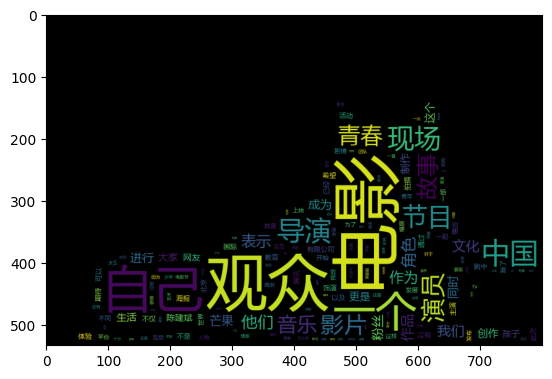

5it [00:05,  1.05s/it]
2023-03-09 00:46:09,384 - 1045884415.py[line:133] - INFO: 词云图生成并保存成功!
2023-03-09 00:46:09,400 - 1045884415.py[line:134] - INFO: 
2023-03-09 00:46:09,400 - 1045884415.py[line:135] - INFO: 选做部分执行完成! Congratulations!


In [146]:
import requests  # 发送网络请求
from bs4 import BeautifulSoup  # 解析html
from datetime import datetime  # 格式化显示时间
from tqdm import tqdm  # 可视化显示进度条
import xlrd  # 读取excel
import xlwt  # 写入excel
import os  # 显示文件路径
from io import BytesIO

import jieba  # 分词
import numpy as np  # 用于生成词云时处理图像
from PIL import Image, ImageSequence  # 用于生成词云时处理图像
import matplotlib.pyplot as plt  # 用于画图
from wordcloud import WordCloud, ImageColorGenerator  # 生成词云
import pdb  # 用于打断点调试
import logging  # 打印日志信息


# 设置日志级别
logging.basicConfig(level=logging.INFO,
format='%(asctime)s - %(filename)s[line:%(lineno)d] - %(levelname)s: %(message)s')


"""
    进阶任务目标：从excel文件中读出爬取的内容，调用jieba进行分词，统计词频并生成词云图。
    进阶任务目标的执行流程已经被封装到work_optional()函数中。其中调用的部分函数功能需要大家自行实现。
"""

def merge_dict(dict1, dict2):
    """
    函数说明：将dict2中的内容合并到dict1中，key不存在则新建，key存在则value相加

    Parameters:
        dict1: 字典1
        dict2: 字典2

    Returns:
        dict1: 将字典2中的内容合并到字典1中
    """
    for k in dict2:
        if k in dict1:
            dict1[k] += dict2[k]
        else:
            dict1[k] = dict2[k]
    return dict1


# (选做部分)
def get_word_freq_dict_from_text(text):
    """
    函数说明：输入一段文本，输出这段文本中长度>=2的词的词频统计字典（去掉了特殊符号，以及长度为1的单个字）

    Parameters:
        text: 一个字符串，代表输入文本

    Returns:
        word_freq_dict: 统计了主要词出现次数的词频字典
    """
    useless_str = '''一！“”，。？、；’"',.、·《》()#\t：\n'''
    word_freq_dict = {}
    # TODO
    cut = jieba.lcut(text)
    for i in cut:
        if len(i) > 1:
            word_freq_dict[i] = word_freq_dict.get(i,0) + 1
    return word_freq_dict


def get_word_frequency_dict(result_list):
    """
    函数说明：给定一个数据列表（可以是全部或切片），统计其中所有“正文内容”字段汇总后的词频分布
            相当于对get_word_freq_dict_from_text()函数的封装

    Parameters:
        result_list: 爬取并解析后的网页内容数据

    Returns:
        word_frequency_dict: 统计了主要词出现次数的词频字典
    """
    word_frequency_dict = {}
    for data in tqdm(result_list):
        current_freq_dict = get_word_freq_dict_from_text(data["正文内容"])
        word_frequency_dict = merge_dict(word_frequency_dict, current_freq_dict)
    return word_frequency_dict


# (选做部分)

def generate_word_cloud(result_list, background_url = 'https://tenfei05.cfp.cn/creative/vcg/800/new/VCG41N931288624.jpg'):
    """
    函数说明：根据过滤不常用词后的词频统计字典，调用wordcloud包生成词云图

    Parameters:
        dict_list: 词频字典

    Returns:
        无
    """
    # TODO
    resp = requests.get(background_url)
    yield # 为了显示进度条，变成迭代器
    bckimg = Image.open(BytesIO(resp.content))
    yield
    mask = np.array(bckimg) # 获取背景图片 :可爱猫猫图
    yield
    w = WordCloud(font_path='msyh.ttc', width=1620, height=1080, margin=10, max_words=200, mask=mask).fit_words(result_list)
    yield
    plt.imshow(w)
    yield
    plt.show()
    w.to_file("./wordcloud.png")

def work_optional():
    """
    函数说明：
        执行 生成词云 流程

    Parameters:
        无

    Returns:
        无
    """
    filename = "./results.xls"
    loaded_data = read_from_excel(filename)


    logging.info(f"开始统计词频并生成词云分布...")
    #print(processed_data)
    processed_data = get_word_frequency_dict(loaded_data)
    logging.info(f"词频统计完毕，正在生成词云分布...")
    for i in tqdm(generate_word_cloud(processed_data)):pass
    logging.info(f"词云图生成并保存成功!")
    logging.info(f"")
    logging.info(f"选做部分执行完成! Congratulations!")
    return
    
if __name__ == '__main__':
    work_optional()  # 运行进阶要求部分代码